# Text Topic Classification

This Jupyter notebook code snippet demonstrates the initial setup for a text classification project utilizing both Natural Language Processing (NLP) and Machine Learning (ML) libraries. The code is structured to import necessary libraries, prepare for data preprocessing, and set up a classification model.

| FEATURE NAME       | BRIEF DESCRIPTION                                                                          |
|--------------------|---------------------------------------------------------------------------------------------|
| **`par_id`**             | Unique identifier for each paragraph to classify.                                           |
| **`paragraph`**          | Text to classify.                                                                           |
| **`has_entity`**         | Whether the text contains a reference to a product (*YES*/*NO*), an organisation (*YES*/*NO*), or a person (*YES*/*NO*). |
| **`lexicon_count`**      | The number of words in the text.                                                            |
| **`difficult_words`**    | The number of difficult words in the text.                                                  |
| **`last_editor_gender`** | The gender of the latest person to edit the text.                                           |
| **`category`**           | The category into which the text should be classified.                                      |
| **`text_clarity`**       | The clarity level of the text. Very few data points are labelled at first.                 |

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns

# Optional: Setup for better visuals
sns.set_theme(style="whitegrid")

# Function to download necessary NLTK resources
def download_nltk_resources():
    resources = ['punkt', 'stopwords', 'wordnet']
    for resource in resources:
        try:
            nltk.data.find(f'tokenizers/{resource}')
            print('Resources downloaded successfully.')
        except LookupError:
            nltk.download(resource)
            print('Resources already downloaded.')
# This code is copied from my previous college project. It is called Lazy Loading NLTK Resources.

# Call the function to download resources if not already present
download_nltk_resources()

Resources downloaded successfully.
Resources already downloaded.
Resources already downloaded.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the dataset for Task 1
def load_t1_df(filename):
    df = pd.read_csv(filename, usecols=['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender', 'category'])
    size = df.shape
    if not df.empty:
        print(f"{size} rows and columns (without `text_clarity`) loaded successfully for taks 1.")
    else:
        print("The dataset is empty.")
    return df

# Load the dataset for Task 2
def load_t2_df(filename):
    df = pd.read_csv(filename, usecols=['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender', 'category', 'text_clarity'])
    size = df.shape
    if not df.empty:
        print(f"{size} rows and columns loaded successfully for task 2.")
    else:
        print("The dataset is empty.")
    return df

'''
	- Function usage: df = load_t1_df('filename_with_path')
	- Replace `filename_with_path` with your original value.
'''

df = load_t1_df('dataset.csv')

(9347, 7) rows and columns (without `text_clarity`) loaded successfully for taks 1.


In [3]:
def clean_df(df):
    print(f'Initial shape: {df.shape}. Checking for missing values...')
    print(df.isnull().sum(), '\n')
    
    # df = df.dropna()
    df.dropna(inplace=True)
    # df.dropna(subset=['category', 'difficult_words'], inplace=True)
    
    print(f'After removing missing values, shape: {df.shape}. Verifying no missing values remain...')
    print(df.isnull().sum())

    return df
    
'''
	- Function usage: df = clean_df(df)
	- Replace `df` with your original DataFrame.
'''

df = clean_df(df)

Initial shape: (9347, 7). Checking for missing values...
par_id                 0
paragraph              0
has_entity             0
lexicon_count          0
difficult_words       18
last_editor_gender     0
category              61
dtype: int64 

After removing missing values, shape: (9268, 7). Verifying no missing values remain...
par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
dtype: int64


In [4]:
def process_df(df):
    # Combine operations for 'category' column
    print('Checking for unique values in the category column')
    print(df['category'].unique())
    
    # Convert the 'category' column to lowercase and print unique values again
    df['category'] = df['category'].str.lower()
    print('\nFixed the case of the category column, unique values now:')
    print(df['category'].unique(), '\n')
    
    # Process 'has_entity' column and remove rows with 'data missing'
    print('\nChecking for unique values in the has_entity column')
    print(df['has_entity'].unique())
    
    df = df[df['has_entity'] != 'data missing']
    print('\nRemoved rows with "data missing" in the has_entity column, unique values now:')
    print(df['has_entity'].unique())

    return df
    
'''
	- Function usage: df = process_df(df)
	- Replace `df` with your original DataFrame.
'''

df = process_df(df)

Checking for unique values in the category column
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'Philosophy' 'Programming'
 'Artificial intelligence' 'Biographies'
 'Movies about artificial intelligence']

Fixed the case of the category column, unique values now:
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence'] 


Checking for unique values in the has_entity column
['ORG_YES_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_NO_PERSON_NO_'
 'ORG_NO_PRODUCT_YES_PERSON_NO_' 'ORG_YES_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_NO_' 'ORG_NO_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_YES_PERSON_NO_'
 'data missing']

Removed rows with "data missing" in the has_entity column, unique values now:
['ORG_YES_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_NO_PERSON_NO_'
 'ORG_NO_PRODUCT_YES_PERSON_NO_' 'ORG_YES_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_

In [5]:
# Display the first few rows of the dfset
print(df.head())

# Display the distribution of the categories
print("\nCategory distribution:\n", df['category'].value_counts())

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

         par_id                                          paragraph  \
0  428209002237  Ramsay was born in Glasgow on 2 October 1852. ...   
1  564218010072  It has been widely estimated for at least the ...   
2  291401001672  He went on to win the Royal Medal of the Royal...   
3   31548004883  The changes have altered many underlying assum...   
4   50634005146  After these novels were published, Disraeli de...   

                        has_entity  lexicon_count  difficult_words  \
0   ORG_YES_PRODUCT_NO_PERSON_YES_             49             12.0   
1    ORG_YES_PRODUCT_NO_PERSON_NO_            166             47.0   
2    ORG_YES_PRODUCT_NO_PERSON_NO_             69             18.0   
3    ORG_NO_PRODUCT_YES_PERSON_NO_             76             27.0   
4  ORG_YES_PRODUCT_YES_PERSON_YES_            200             47.0   

  last_editor_gender                 category  
0                man              biographies  
1                man  artificial intelligence  
2         non-

### Prepare the Dataset for Balancing
Before applying SMOTE and Random Under-Sampling, we need to prepare our dataset. This involves separating the features from the labels and handling the `has_entity` feature properly.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Separating the features and labels
X = df.drop(['category', 'par_id', 'lexicon_count', 'difficult_words', 'last_editor_gender'], axis=1)
y = df['category']

# Handling the `has_entity` feature
# Assuming `has_entity` is categorical and needs to be converted into a numerical format
X = pd.get_dummies(X, columns=['has_entity'])

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Apply SMOTE and Random Under-Sampling

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the SMOTE and Random Under-Sampling strategy
over = SMOTE(sampling_strategy='auto')
under = RandomUnderSampler(sampling_strategy='auto')

# Create a pipeline that first applies SMOTE and then applies Random Under-Sampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Text Vectorization
tfidf = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
X_text = tfidf.fit_transform(df['paragraph']).toarray()

# Step 2: One-Hot Encoding for `has_entity`
# Correcting the OneHotEncoder usage
encoder = OneHotEncoder()
X_entity = encoder.fit_transform(df[['has_entity']]).toarray()  # Converting to dense array immediately


# Combine text vectors and `has_entity` features
import numpy as np
X_combined = np.hstack((X_text, X_entity))

# Encode the labels
y_encoded = label_encoder.fit_transform(df['category'])

# Now split your df into a training set and a testing set to avoid df leakage
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE and Random Under-Sampling on the training set
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Assuming y_resampled is your array of resampled labels after applying SMOTE and under-sampling
y_resampled_labels = label_encoder.inverse_transform(y_resampled)

### Visualize the Data Before and After Balancing
Now, let's visualize the category distribution before and after applying **SMOTE** and **Random Under-Sampling**. We'll create two pie charts and two vertical bar graphs to show the distributions.

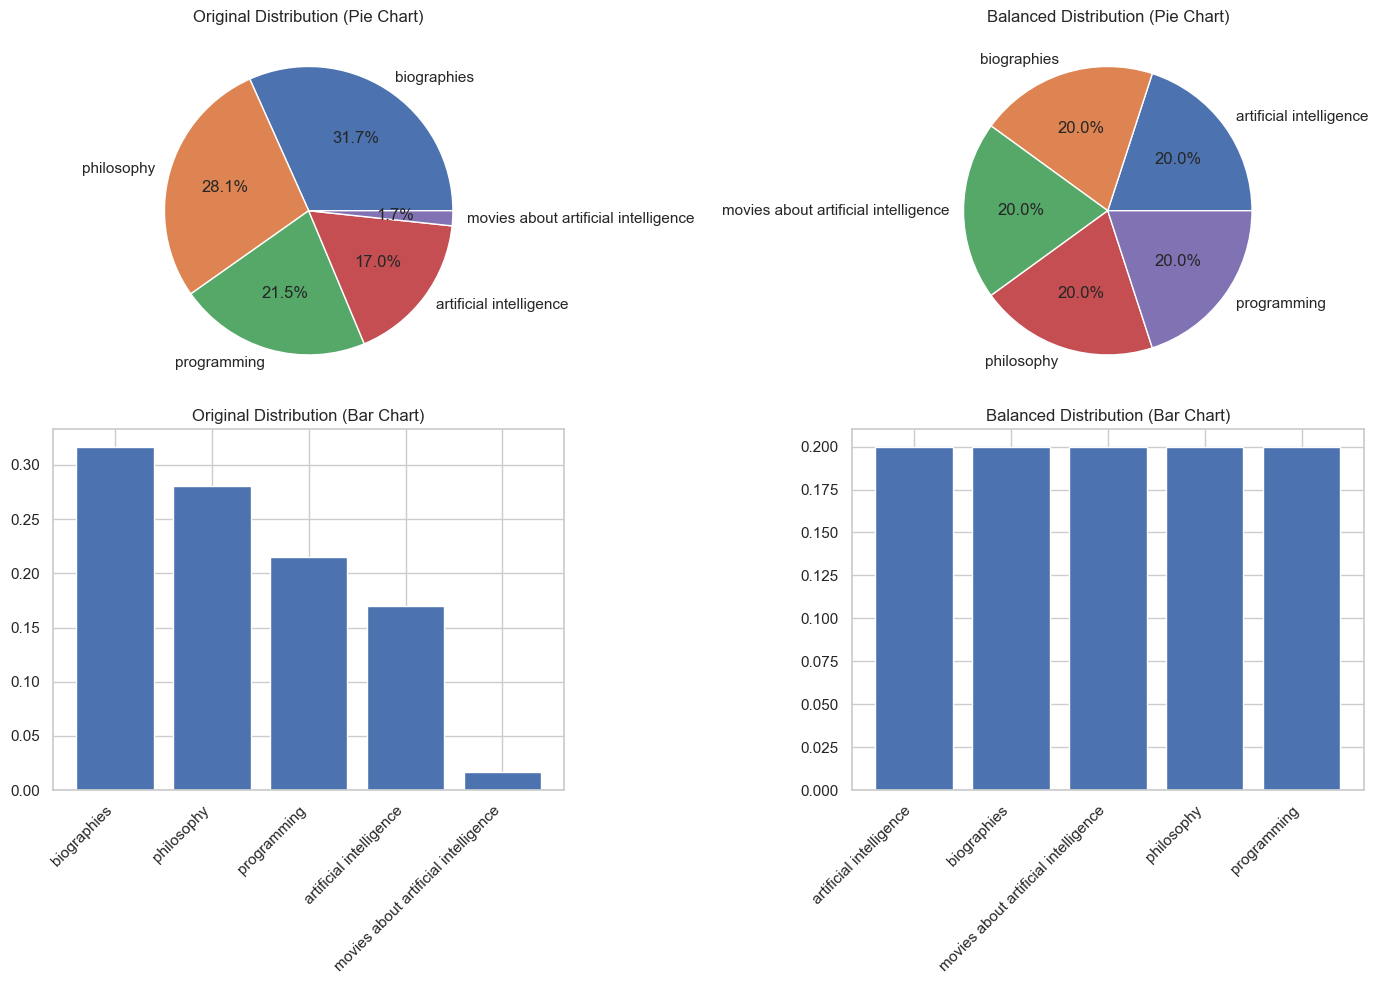

In [11]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

def plot_distributions(y_initial, y_resampled):
    # Original distribution - convert y_initial to labels if it's encoded
    original_dist = pd.Series(y_initial).value_counts(normalize=True)
    
    # Adjusting for the resampled distribution - directly use y_resampled since it's already in label form
    resampled_dist = pd.Series(y_resampled).value_counts(normalize=True)
    
    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    
    # Adjusting labels for original distribution if necessary
    original_labels = label_encoder.inverse_transform(original_dist.index) if original_dist.index.dtype == 'int' else original_dist.index
    
    # Pie chart before balancing
    ax[0, 0].pie(original_dist, labels=original_labels, autopct='%1.1f%%')
    ax[0, 0].set_title('Original Distribution (Pie Chart)')
    
    # Pie chart after balancing - Note: y_resampled is already in the correct format
    ax[0, 1].pie(resampled_dist, labels=resampled_dist.index, autopct='%1.1f%%')
    ax[0, 1].set_title('Balanced Distribution (Pie Chart)')
    
    # Bar chart before balancing
    ax[1, 0].bar(range(len(original_dist)), original_dist.values, tick_label=original_labels)
    ax[1, 0].set_title('Original Distribution (Bar Chart)')
    ax[1, 0].set_xticklabels(original_dist.index, rotation=45, ha="right")
    
    # Bar chart after balancing
    ax[1, 1].bar(range(len(resampled_dist)), resampled_dist.values, tick_label=resampled_dist.index)
    ax[1, 1].set_title('Balanced Distribution (Bar Chart)')
    ax[1, 1].set_xticklabels(resampled_dist.index, rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

# Make sure to convert y_train back to labels if it's encoded before passing
y_train_labels = label_encoder.inverse_transform(y_train) if np.issubdtype(y_train.dtype, np.integer) else y_train

# Now, call the plotting function with the correct variables
plot_distributions(y_train_labels, y_resampled_labels)

# 
X_resampled_svm_clf = X_resampled
y_resampled_svm_clf = y_resampled

# 
X_resampled_rf_clf = X_resampled
y_resampled_rf_clf = y_resampled

# 
X_resampled_mlp_clf = X_resampled
y_resampled_mlp_clf = y_resampled

# 
X_resampled_mnb_clf = X_resampled
y_resampled_mnb_clf = y_resampled

### Model Training and Evaluation

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Support Vector Classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_resampled_svm_clf, y_resampled_svm_clf)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_resampled_rf_clf, y_resampled_rf_clf)

# Neural Network Classifier (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500)
mlp_clf.fit(X_resampled_mlp_clf, y_resampled_mlp_clf)

# Multinomial Naive Bayes Classifier
mnb_clf = MultinomialNB()
mnb_clf.fit(X_resampled_mnb_clf, y_resampled_mnb_clf)

# Predict on the test set with SVM
y_pred_svm = svm_clf.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# Predict on the test set with Random Forest
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Predict on the test set with Neural Network Classifier (MLP)
y_pred_mlp = mlp_clf.predict(X_test)
print(f"Neural Network Classifier (MLP) Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))

# Predict on the test set with Multinomial Naive Bayes
y_pred_mnb = mnb_clf.predict(X_test)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_mnb)}")
print(classification_report(y_test, y_pred_mnb))

SVM Accuracy: 0.8875067604110329
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       309
           1       0.94      0.89      0.91       596
           2       0.94      0.79      0.86        42
           3       0.87      0.89      0.88       511
           4       0.92      0.91      0.92       391

    accuracy                           0.89      1849
   macro avg       0.89      0.87      0.88      1849
weighted avg       0.89      0.89      0.89      1849

Random Forest Accuracy: 0.8253109789075176
              precision    recall  f1-score   support

           0       0.86      0.67      0.76       309
           1       0.85      0.88      0.87       596
           2       0.97      0.71      0.82        42
           3       0.77      0.83      0.80       511
           4       0.83      0.86      0.84       391

    accuracy                           0.83      1849
   macro avg       0.86      0.79      0.82      1849
w

In [ ]:
import gensim

# Download and load the Word2Vec model (this could take a while)
file_path = r'C:\Users\muhammedazhar\Developer\MSc-DataScience\COMP1804-AML\Coursework\WordEmbeddings\GoogleNews-vectors-negative300.bin'
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)

# Function to vectorize a sentence based on the word2vec model
def get_vector(sentence):
    tokens = nltk.word_tokenize(sentence.lower())
    tokens = [token for token in tokens if token not in nltk.corpus.stopwords.words('english')]

    valid_tokens = [word for word in tokens if word in word2vec_model]
    if valid_tokens:
        vector = np.mean(word2vec_model[valid_tokens], axis=0)
    else:
        vector = np.zeros(300)  # Assuming Word2Vec vectors are of size 300
    return vector

# Apply the vectorization to each paragraph
X_word2vec = np.array([get_vector(text) for text in df['paragraph']])

### Class Imbalance and Model Bias
To further address class imbalance and model bias, you might want to explore more sophisticated techniques like cost-sensitive learning or anomaly detection methods for minority classes.

#### Complex Models
Experiment with more complex models and machine learning algorithms like SVM, Random Forest, or neural networks.

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Support Vector Classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_resampled_svm_clf, y_resampled_svm_clf)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_resampled_rf_clf, y_resampled_rf_clf)

# Neural Network Classifier (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500)
mlp_clf.fit(X_resampled_mlp_clf, y_resampled_mlp_clf)

# Multinomial Naive Bayes Classifier
mnb_clf = MultinomialNB()
mnb_clf.fit(X_resampled_mnb_clf, y_resampled_mnb_clf)

MultinomialNB()

### Cross-Validation
Implement cross-validation to ensure stability and reliability of your model.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each classifier
# cv_scores_svm = cross_val_score(svm_clf, X_resampled_svm_clf, y_resampled_svm_clf, cv=5)
# cv_scores_rf = cross_val_score(rf_clf, X_resampled_rf_clf, y_resampled_rf_clf, cv=5)
# cv_scores_mlp = cross_val_score(mlp_clf, X_resampled_mlp_clf, y_resampled_mlp_clf, cv=5)
# cv_scores_mnb = cross_val_score(mnb_clf, X_resampled_mnb_clf, y_resampled_mnb_clf, cv=5)

cv_scores_svm = cross_val_score(svm_clf, X_resampled, y_resampled, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X_resampled, y_resampled, cv=5)
cv_scores_mlp = cross_val_score(mlp_clf, X_resampled, y_resampled, cv=5)
cv_scores_mnb = cross_val_score(mnb_clf, X_resampled, y_resampled, cv=5)

# Output the cross-validation scores for each classifier

print(f"--- Support Vector Classifier (SVM) ---")
print(f"CV scores: {cv_scores_svm}")
print(f"CV average score: {np.mean(cv_scores_svm)}")

print(f"\n--- Random Forest Classifier (RF) ---")
print(f"CV scores: {cv_scores_rf}")
print(f"CV average score: {np.mean(cv_scores_rf)}")

print(f"\n--- Neural Network Classifier (MLP) ---")
print(f"CV scores: {cv_scores_mlp}")
print(f"CV average score: {np.mean(cv_scores_mlp)}")

print(f"\n--- Multinomial Naive Bayes (MNB) ---")
print(f"CV scores: {cv_scores_mnb}")
print(f"CV average score: {np.mean(cv_scores_mnb)}")


--- Support Vector Classifier (SVM) ---
CV scores: [0.90443686 0.8971843  0.91638225 0.90699659 0.90656997]
CV average score: 0.9063139931740615

--- Random Forest Classifier (RF) ---
CV scores: [0.87713311 0.87713311 0.89291809 0.90742321 0.91467577]
CV average score: 0.8938566552901024

--- Neural Network Classifier (MLP) ---
CV scores: [0.92107509 0.90955631 0.92107509 0.92448805 0.92918089]
CV average score: 0.921075085324232

--- Multinomial Naive Bayes (MNB) ---
CV scores: [0.88523891 0.8809727  0.8912116  0.88865188 0.89035836]
CV average score: 0.8872866894197953
